<a href="https://colab.research.google.com/github/KunChen-tw/DeepLearning/blob/main/Practice_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice 3-1

Modify above program to classify even or odd.


In [1]:
import os
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torchvision.datasets import MNIST

PATH_DATASETS = ""
BATCH_SIZE = 1024
# 偵測目前電腦是否有 cuda 可以跑，若沒有的話，用 CPU 跑
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# download MNIST training data at the same directory with current program file
train_ds = MNIST(PATH_DATASETS, train=True, download=True,
                 transform=transforms.ToTensor()) # transforms.ToTensor() 將像素範圍 0~255 轉換成 0~1

# download MNIST test data
test_ds = MNIST(PATH_DATASETS, train=False, download=True,
                 transform=transforms.ToTensor())

# the shape of training data and test data
print(train_ds.data.shape, test_ds.data.shape)
print(train_ds.targets.shape, test_ds.targets.shape)



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15962588.57it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 495746.65it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4447295.50it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2344680.46it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])
torch.Size([60000]) torch.Size([10000])


# 修改 targets

原圖片對應的 target 是 0 到 9, 因為要判斷奇偶數，所以將 target 改成 0 為偶數，1為奇數


In [5]:
# 重新標籤，0 = 偶數，1 = 奇數
def relabel_mnist(dataset):
    for i in range(len(dataset.targets)):
        dataset.targets[i] = dataset.targets[i] % 2  # 偶數為 0，奇數為 1
    return dataset

print("修改前：")
print(train_ds.targets)
train_ds = relabel_mnist(train_ds)
test_ds = relabel_mnist(test_ds)
print("修改後：")
print(train_ds.targets)


修改前：
tensor([5, 0, 4,  ..., 5, 6, 8])
修改後：
tensor([1, 0, 0,  ..., 1, 0, 0])


# 修改類神經模型，原本輸出是 0到9 10個數字，改成輸出為2

In [19]:
# Create model
model = torch.nn.Sequential(
    torch.nn.Flatten(), # 將二維短陣轉成一維矩陣
    torch.nn.Linear(28 * 28, 128), # 第一層，全連接
    torch.nn.Linear(128, 64),     # 第二層，全連接
    torch.nn.Linear(64, 2),     # 第三層，輸出層，改為兩個輸出（奇數和偶數）
).to(device)

# 訓練模型

In [26]:
epochs = 5
lr=0.01

# Create DataLoader
train_loader = DataLoader(train_ds, batch_size=600)  #batch_size=600 表示一次同時處理600張資料

# Set optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

model.train() # set the model to training mode
loss_list = []

for epoch in range(1, epochs + 1):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device) # 設定資料在 CPU 還是 GPU 跑

        optimizer.zero_grad()
        output = model(data)

        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 10 == 0:
            loss_list.append(loss.item())
            batch = batch_idx * len(data)
            data_count = len(train_loader.dataset)
            percentage = (100. * batch_idx / len(train_loader))
            print(f'Epoch {epoch}: [{batch:5d} / {data_count}] ({percentage:.0f} %)' +
                  f'  Loss: {loss.item():.6f}')

Epoch 1: [    0 / 60000] (0 %)  Loss: 0.393117
Epoch 1: [ 6000 / 60000] (10 %)  Loss: 0.821403
Epoch 1: [12000 / 60000] (20 %)  Loss: 1.709092
Epoch 1: [18000 / 60000] (30 %)  Loss: 0.398588
Epoch 1: [24000 / 60000] (40 %)  Loss: 0.420462
Epoch 1: [30000 / 60000] (50 %)  Loss: 0.356913
Epoch 1: [36000 / 60000] (60 %)  Loss: 0.305297
Epoch 1: [42000 / 60000] (70 %)  Loss: 0.342231
Epoch 1: [48000 / 60000] (80 %)  Loss: 0.279428
Epoch 1: [54000 / 60000] (90 %)  Loss: 0.255387
Epoch 2: [    0 / 60000] (0 %)  Loss: 0.233183
Epoch 2: [ 6000 / 60000] (10 %)  Loss: 0.232570
Epoch 2: [12000 / 60000] (20 %)  Loss: 0.355605
Epoch 2: [18000 / 60000] (30 %)  Loss: 0.266842
Epoch 2: [24000 / 60000] (40 %)  Loss: 0.240220
Epoch 2: [30000 / 60000] (50 %)  Loss: 0.311473
Epoch 2: [36000 / 60000] (60 %)  Loss: 0.262572
Epoch 2: [42000 / 60000] (70 %)  Loss: 0.330348
Epoch 2: [48000 / 60000] (80 %)  Loss: 0.253411
Epoch 2: [54000 / 60000] (90 %)  Loss: 0.243936
Epoch 3: [    0 / 60000] (0 %)  Loss: 0.22

# Loss 每次訓練的變化

Average_loss: 0.0000, correct_rate: 9002/10000 (90%)



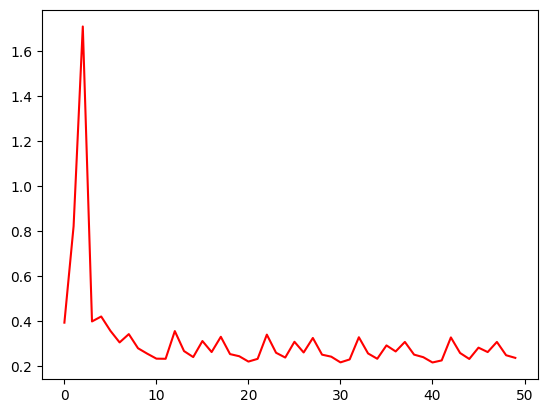

In [27]:
import matplotlib.pyplot as plt
plt.plot(loss_list, 'r')

test_loader = DataLoader(test_ds, shuffle=False, batch_size=test_ds.targets.shape[0]) # shuffle=False 資料不打亂

model.eval()
test_loss = 0
correct = 0
for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = model(data)

    # sum up batch loss
    test_loss += criterion(output, target).item()
    pred = output.argmax(dim=1)
    correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
batch = batch_idx * len(data)
data_count = len(test_loader.dataset)
percentage = 100. * correct / data_count
print(f'Average_loss: {test_loss:.4f}, correct_rate: {correct}/{data_count}' +
      f' ({percentage:.0f}%)\n')

# 預測資料

In [28]:
predictions = []
with torch.no_grad():
    for i in range(20):
        data, target = test_ds[i][0], test_ds[i][1]
        data = data.reshape(1, *data.shape).to(device) # *:Unpack the list into independent parameters
        output = torch.argmax(model(data), dim=1)
        predictions.append(str(output.item()))

print('actual    :', test_ds.targets[0:20].numpy())
print('prediction: ', ' '.join(predictions[0:20]))

import numpy as np

i=8 # 取第8筆資料
data = test_ds[i][0]
data = data.reshape(1, *data.shape).to(device) # *:Unpack the list into independent parameters

#print(data.shape)
predictions = torch.softmax(model(data), dim=1)
print(f'even or odd predict rate: {np.around(predictions.cpu().detach().numpy(), 2)}')
# print(f'even or odd predict rate: {np.argmax(predictions.cpu().detach().numpy(), dim=1)}')

actual    : [1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0]
prediction:  1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0
even or odd predict rate: [[0.59 0.41]]
